In [9]:
#Importing libraries
import seaborn as sns
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [10]:
#Load the data
df = pd.read_csv(r'C:\Users\agamk\OneDrive\Desktop\Work\NLP\Project\train_E6oV3lV.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [11]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## Preprocessing the data

In [14]:
#removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [15]:
#remove the twitter handles
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [16]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [17]:
#remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

In [18]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [20]:
#removing short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [21]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [22]:
#Tokenization
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())

In [23]:
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [26]:
#Stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.tail()

31957                                        [that, youuu]
31958    [nina, turner, airwav, tri, wrap, herself, man...
31959                   [listen, song, monday, morn, work]
31960    [#sikh, #templ, vandali, #calgari, #wso, condemn]
31961                                      [thank, follow]
Name: clean_tweet, dtype: object

In [27]:
#combine into single string
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit cau they offer wheelchair v...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


## Exploratory Data Analysis

In [35]:
#visualize the frequent words
all_words= " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height=500, random_state=42, max_font_size=100).generate(all_words)

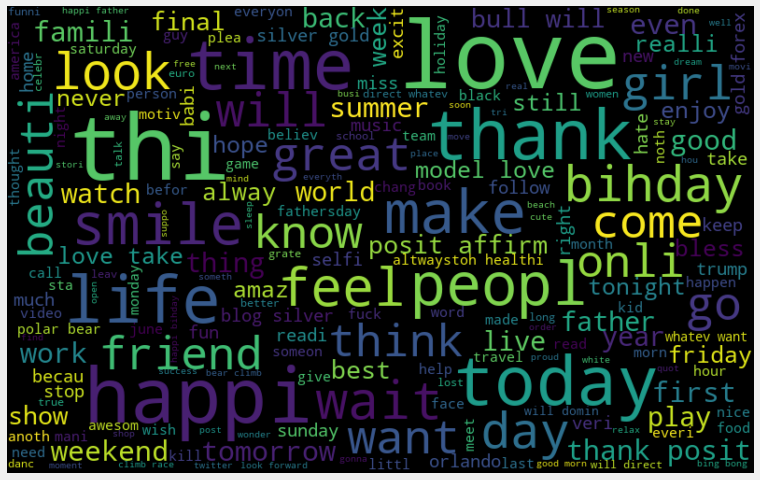

In [36]:
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

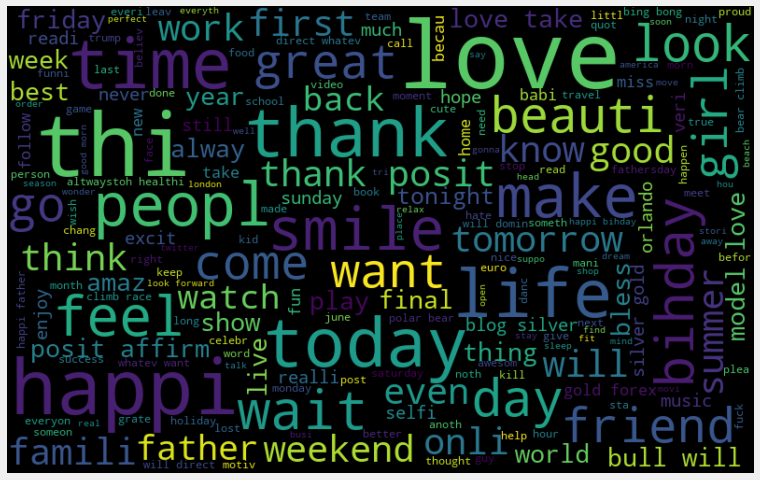

In [37]:
#visual for positive words
all_words= " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width = 800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

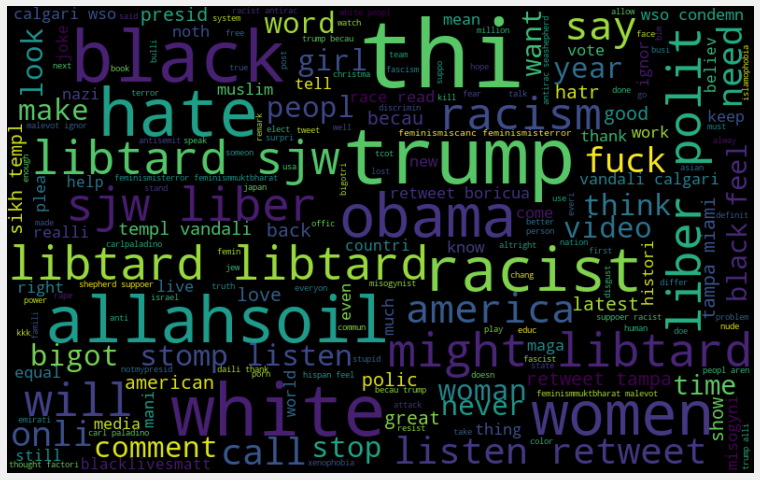

In [38]:
#visual for negative words
all_words= " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width = 800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

In [50]:
#extract the hashtag
def hashtag_extract(tweet):
    hashtags = []
    for word in tweet:
        ht = re.findall(r"#(\w+)", word)
        hashtags.append(ht)
    return hashtags

In [51]:
#extract hashtags for non racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

#extract hashtags for racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [52]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [53]:
#unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [54]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [58]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


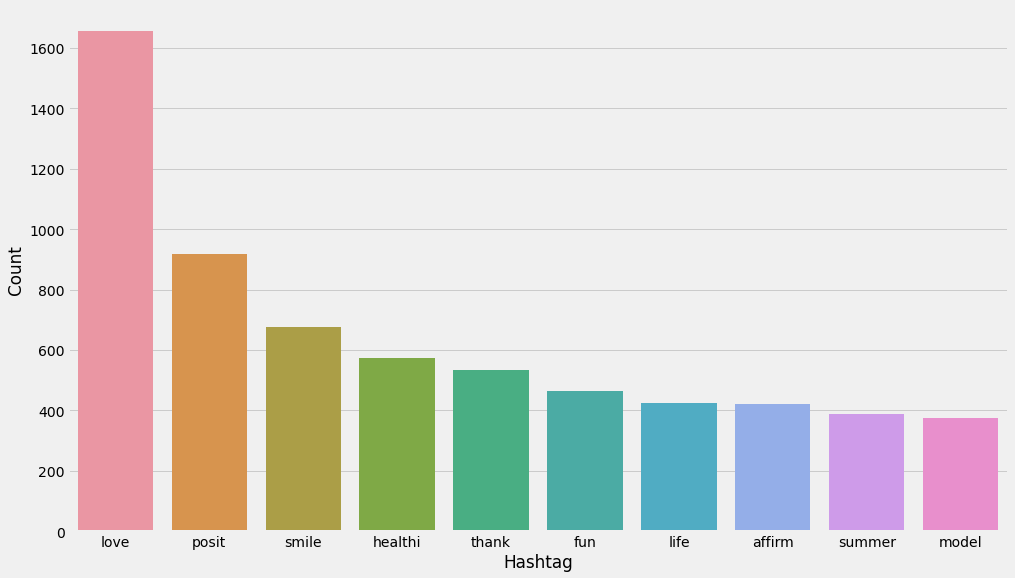

In [61]:
#select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize =(15,9))
sns.barplot(data = d, x='Hashtag', y='Count')
plt.show()

In [62]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


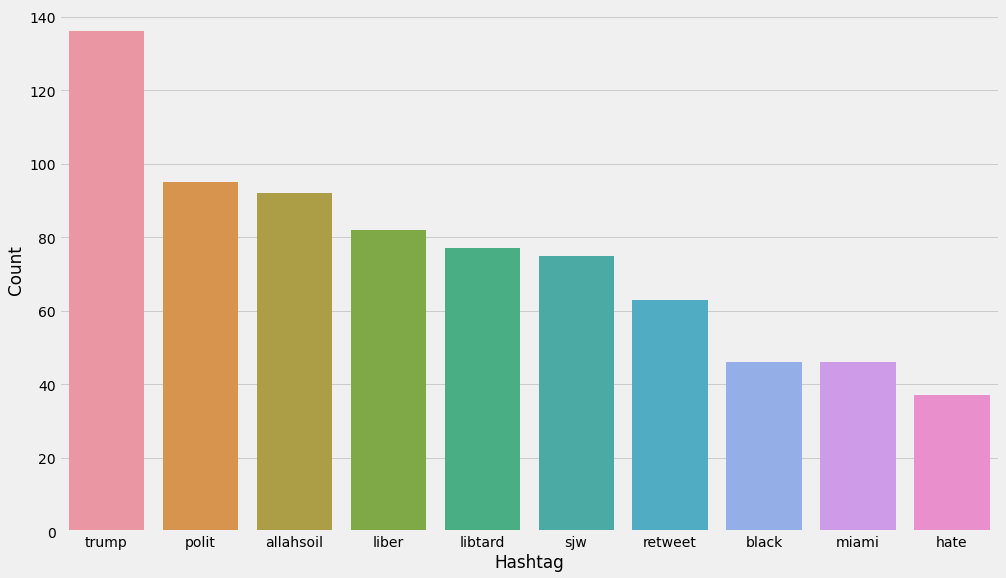

In [63]:
#select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize =(15,9))
sns.barplot(data = d, x='Hashtag', y='Count')
plt.show()

## Input Split

In [66]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.9, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

## Model Training

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [72]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [73]:
#testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.49282296650717705

In [75]:
accuracy_score(y_test, pred)

0.9469403078463271

In [78]:
#use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >=0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.556201550387597

In [79]:
accuracy_score(y_test, pred)

0.9426855212113627

In [88]:
pred_prob[0][1] >= 0.3

False